In [2]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "SimplifiedIndexing")

In [7]:
group = benchmark.groups["one_to_one"]

# names = sorted(pd.concat([run.data for run in group.runs], join="inner")["Name"].unique())
# palette = dict(zip(names, sns.color_palette(n_colors=len(names))))
# input_sizes_str = set([str(run.input_size) for run in group.runs])
#
# input_sizes = sorted([InputSize.from_string(input_size_str) for input_size_str in input_sizes_str], key=lambda in_size: (in_size.matrix_area(), in_size.right_matrices))

data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
data = data[data["Input matrix cols"] < 128]
grouped = data.groupby(["Name", "Args", "Input total items"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

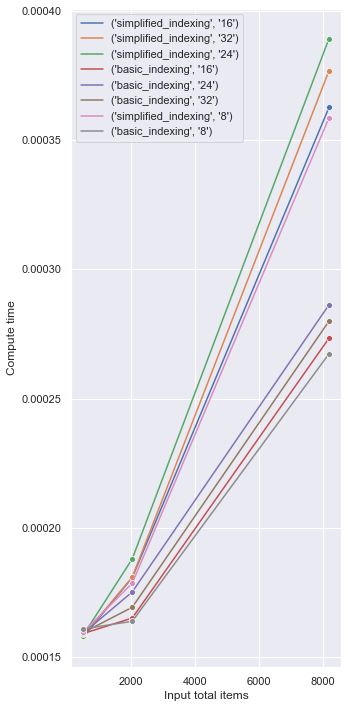

In [8]:
sns.set(rc={'figure.figsize': (5, 10)})
fig, ax = plt.subplots()

ax = sns.lineplot(data=results, x="Input total items", y="Compute time", hue=results[["Name", "Args"]].apply(tuple, axis=1), marker='o', ax=ax)
fig.tight_layout()